In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm.auto import tqdm

from loren_frank_data_processing import (make_epochs_dataframe, make_neuron_dataframe)
from src.parameters import (ANIMALS, MIN_N_NEURONS, _BRAIN_AREAS)
from ZilongCode.utils import get_sweep_and_awake_replay_results

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)

neuron_info = neuron_info.loc[
(neuron_info.type == 'principal') &
(neuron_info.numspikes > 100) &
neuron_info.area.isin(_BRAIN_AREAS)]


n_neurons = (neuron_info
                .groupby(['animal', 'day', 'epoch'])
                .neuron_id
                .agg(len)
                .rename('n_neurons')
                .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
                .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB']))

### 1, get correlation between theta sweep length and the awake replay diffusion exponent

In [4]:
animal_names = ['bon', 'fra', 'gov', 'dud', 'con', 'dav', 'Cor', 'egy', 'cha']

all_sweep_len_peranimal = {}; all_sweep_len_perday = {}
all_exponent_peranimal = {}; all_exponent_perday = {}
all_intercept_peranimal = {}; all_intercept_perday = {}
all_ave_speed_peranimal = {}; all_ave_speed_perday = {}
all_ave_activespeed_peranimal = {}; all_ave_activespeed_perday = {}
DATA_DIR = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data'

for name in animal_names:
    
    is_animal = epoch_info.index.isin([name], level='animal')

    valid_epochs = (is_w_track &
                    (epoch_info.n_neurons > MIN_N_NEURONS) &
                    is_animal
                    )

    # #add remy 37 4 to the valid_epochs since this is the only valid epoch for remy. 
    # #generally data for remy was stored differently from other animals
    # valid_epochs[('remy', 37, 4)] = True
    
    sweep_len = []
    exponent = []
    intercept = []
    ave_speed = []
    ave_activespeed = []
    for epoch_key in tqdm(epoch_info[valid_epochs].index, desc='epochs'):
        animal, day, epoch = epoch_key
        
        #skip 'egy', 10, 2 since no mental_distance_from_actual_position is saved (double check later)
        if (animal, day, epoch) == ('egy', 10, 2):
            continue

        print(f'Animal: {animal}, Day: {day}, Epoch: {epoch}')
        
        #get the average sweep length and replay exponent
        mean_immobile_speed, mean_active_speed, mean_sweep_dist, replay_exponent, replay_intercept = get_sweep_and_awake_replay_results(epoch_key, DATA_DIR, sweep_speed_threshold=4)
        
        #print the average sweep length and replay exponent in one line, keep three decimal places
        print(f'Average sweep length: {mean_sweep_dist:.3f}, Diffusion exponent: {replay_exponent:.3f}')
        
        #attach (without overwriting) mean_immobile_speed, mean_sweep_dist, replay_exponent to 
        #all_sweep_len_perday, all_exponent_perday, all_ave_speed_perday with the key of (animal, day)
        all_sweep_len_perday.setdefault((animal, day), []).append(mean_sweep_dist)
        all_exponent_perday.setdefault((animal, day), []).append(replay_exponent)
        all_intercept_perday.setdefault((animal, day), []).append(replay_intercept)
        all_ave_speed_perday.setdefault((animal, day), []).append(mean_immobile_speed)
        all_ave_activespeed_perday.setdefault((animal, day), []).append(mean_active_speed)
        
        ave_speed.append(mean_immobile_speed)
        ave_activespeed.append(mean_active_speed)
        sweep_len.append(mean_sweep_dist)
        exponent.append(replay_exponent)
        intercept.append(replay_intercept)
        
    all_ave_speed_peranimal[name] = ave_speed   
    all_ave_activespeed_peranimal[name] = ave_activespeed
    all_sweep_len_peranimal[name] = sweep_len
    all_exponent_peranimal[name] = exponent
    all_intercept_peranimal[name] = intercept


epochs:   0%|          | 0/24 [00:00<?, ?it/s]

Animal: bon, Day: 3, Epoch: 2


Average sweep length: 28.694, Diffusion exponent: 0.836
Animal: bon, Day: 3, Epoch: 4
Average sweep length: 15.452, Diffusion exponent: 0.840
Animal: bon, Day: 3, Epoch: 6
Average sweep length: 22.764, Diffusion exponent: 0.476
Animal: bon, Day: 4, Epoch: 2
Average sweep length: 18.438, Diffusion exponent: 0.838
Animal: bon, Day: 4, Epoch: 4
Average sweep length: 17.515, Diffusion exponent: 0.759
Animal: bon, Day: 4, Epoch: 6
Average sweep length: 26.638, Diffusion exponent: 0.643
Animal: bon, Day: 5, Epoch: 2
Average sweep length: 15.255, Diffusion exponent: 0.751
Animal: bon, Day: 5, Epoch: 4
Average sweep length: 14.941, Diffusion exponent: 0.756
Animal: bon, Day: 5, Epoch: 6
Average sweep length: 24.863, Diffusion exponent: 0.616
Animal: bon, Day: 6, Epoch: 2
Average sweep length: 18.539, Diffusion exponent: 0.748
Animal: bon, Day: 6, Epoch: 4
Average sweep length: 15.474, Diffusion exponent: 0.661
Animal: bon, Day: 6, Epoch: 6
Average sweep length: 23.922, Diffusion exponent: 0.57

epochs:   0%|          | 0/27 [00:00<?, ?it/s]

Animal: fra, Day: 4, Epoch: 2
Average sweep length: 20.092, Diffusion exponent: 0.813
Animal: fra, Day: 4, Epoch: 4
Average sweep length: 17.059, Diffusion exponent: 0.755
Animal: fra, Day: 4, Epoch: 6
Average sweep length: 18.628, Diffusion exponent: 0.570
Animal: fra, Day: 5, Epoch: 2
Average sweep length: 29.320, Diffusion exponent: 0.723
Animal: fra, Day: 5, Epoch: 4
Average sweep length: 22.498, Diffusion exponent: 0.748
Animal: fra, Day: 5, Epoch: 6
Average sweep length: 17.249, Diffusion exponent: 0.652
Animal: fra, Day: 6, Epoch: 2
Average sweep length: 20.728, Diffusion exponent: 0.775
Animal: fra, Day: 6, Epoch: 4
Average sweep length: 19.103, Diffusion exponent: 0.802
Animal: fra, Day: 6, Epoch: 6
Average sweep length: 15.996, Diffusion exponent: 0.559
Animal: fra, Day: 7, Epoch: 2
Average sweep length: 17.274, Diffusion exponent: 0.778
Animal: fra, Day: 7, Epoch: 4
Average sweep length: 15.934, Diffusion exponent: 0.735
Animal: fra, Day: 7, Epoch: 6
Average sweep length: 16

epochs:   0%|          | 0/24 [00:00<?, ?it/s]

Animal: gov, Day: 6, Epoch: 2
Average sweep length: 42.181, Diffusion exponent: 0.770
Animal: gov, Day: 6, Epoch: 4
Average sweep length: 38.538, Diffusion exponent: 0.834
Animal: gov, Day: 6, Epoch: 6
Average sweep length: 31.102, Diffusion exponent: 0.765
Animal: gov, Day: 7, Epoch: 2
Average sweep length: 30.097, Diffusion exponent: 0.792
Animal: gov, Day: 7, Epoch: 4
Average sweep length: 23.374, Diffusion exponent: 0.771
Animal: gov, Day: 7, Epoch: 6
Average sweep length: 32.112, Diffusion exponent: 0.857
Animal: gov, Day: 8, Epoch: 2
Average sweep length: 27.411, Diffusion exponent: 0.782
Animal: gov, Day: 8, Epoch: 4
Average sweep length: 24.466, Diffusion exponent: 0.810
Animal: gov, Day: 8, Epoch: 6
Average sweep length: 31.787, Diffusion exponent: 0.662
Animal: gov, Day: 9, Epoch: 2
Average sweep length: 40.371, Diffusion exponent: 0.772
Animal: gov, Day: 9, Epoch: 3
Average sweep length: 24.728, Diffusion exponent: 0.713
Animal: gov, Day: 9, Epoch: 5
Average sweep length: 34

epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Animal: dud, Day: 2, Epoch: 2
Average sweep length: 51.268, Diffusion exponent: 0.792
Animal: dud, Day: 5, Epoch: 2
Average sweep length: 41.509, Diffusion exponent: 0.810


epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Animal: con, Day: 1, Epoch: 2
Average sweep length: 29.336, Diffusion exponent: 0.803
Animal: con, Day: 1, Epoch: 4
Average sweep length: 21.269, Diffusion exponent: 0.903
Animal: con, Day: 2, Epoch: 2
Average sweep length: 25.001, Diffusion exponent: 1.084
Animal: con, Day: 2, Epoch: 4
Average sweep length: 22.739, Diffusion exponent: 0.931
Animal: con, Day: 3, Epoch: 2
Average sweep length: 26.488, Diffusion exponent: 0.955
Animal: con, Day: 3, Epoch: 4
Average sweep length: 20.019, Diffusion exponent: 0.953
Animal: con, Day: 4, Epoch: 2
Average sweep length: 25.689, Diffusion exponent: 0.629
Animal: con, Day: 4, Epoch: 4
Average sweep length: 22.011, Diffusion exponent: 0.902
Animal: con, Day: 4, Epoch: 6
Average sweep length: 19.763, Diffusion exponent: 0.602
Animal: con, Day: 5, Epoch: 2
Average sweep length: 21.089, Diffusion exponent: 0.914
Animal: con, Day: 5, Epoch: 4
Average sweep length: 19.997, Diffusion exponent: 0.767
Animal: con, Day: 5, Epoch: 6
Average sweep length: 22

epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Animal: dav, Day: 3, Epoch: 2
Average sweep length: 37.958, Diffusion exponent: 0.864
Animal: dav, Day: 3, Epoch: 4
Average sweep length: 31.233, Diffusion exponent: 0.761
Animal: dav, Day: 3, Epoch: 6
Average sweep length: 33.076, Diffusion exponent: 0.865
Animal: dav, Day: 4, Epoch: 2
Average sweep length: 45.286, Diffusion exponent: 0.811
Animal: dav, Day: 4, Epoch: 4
Average sweep length: 28.193, Diffusion exponent: 0.860
Animal: dav, Day: 4, Epoch: 6
Average sweep length: 26.897, Diffusion exponent: 0.812
Animal: dav, Day: 5, Epoch: 3
Average sweep length: 37.314, Diffusion exponent: 0.823
Animal: dav, Day: 6, Epoch: 2
Average sweep length: 32.341, Diffusion exponent: 0.781
Animal: dav, Day: 6, Epoch: 4
Average sweep length: 22.005, Diffusion exponent: 0.911
Animal: dav, Day: 6, Epoch: 6
Average sweep length: 27.046, Diffusion exponent: 0.752
Animal: dav, Day: 7, Epoch: 2
Average sweep length: 27.716, Diffusion exponent: 0.810
Animal: dav, Day: 7, Epoch: 3
Average sweep length: 27

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Animal: Cor, Day: 1, Epoch: 2
Average sweep length: 47.554, Diffusion exponent: 0.781
Animal: Cor, Day: 1, Epoch: 4
Average sweep length: 26.151, Diffusion exponent: 0.863
Animal: Cor, Day: 2, Epoch: 2
Average sweep length: 27.537, Diffusion exponent: 0.774
Animal: Cor, Day: 2, Epoch: 4
Average sweep length: 25.822, Diffusion exponent: 0.703
Animal: Cor, Day: 3, Epoch: 2
Average sweep length: 27.993, Diffusion exponent: 0.745
Animal: Cor, Day: 3, Epoch: 4
Average sweep length: 23.716, Diffusion exponent: 0.816
Animal: Cor, Day: 4, Epoch: 2
Average sweep length: 27.034, Diffusion exponent: 0.798
Animal: Cor, Day: 4, Epoch: 4
Average sweep length: 70.488, Diffusion exponent: 0.780
Animal: Cor, Day: 7, Epoch: 2
Average sweep length: 24.679, Diffusion exponent: 0.807
Animal: Cor, Day: 8, Epoch: 2
Average sweep length: 32.787, Diffusion exponent: 0.730


epochs:   0%|          | 0/19 [00:00<?, ?it/s]

Animal: egy, Day: 5, Epoch: 2
Average sweep length: 30.278, Diffusion exponent: 0.800
Animal: egy, Day: 5, Epoch: 4
Average sweep length: 26.949, Diffusion exponent: 0.868
Animal: egy, Day: 5, Epoch: 6
Average sweep length: 29.352, Diffusion exponent: 0.730
Animal: egy, Day: 6, Epoch: 4
Average sweep length: 38.525, Diffusion exponent: 0.856
Animal: egy, Day: 6, Epoch: 7
Average sweep length: 33.940, Diffusion exponent: 0.805
Animal: egy, Day: 7, Epoch: 2
Average sweep length: 38.709, Diffusion exponent: 0.810
Animal: egy, Day: 7, Epoch: 4
Average sweep length: 34.899, Diffusion exponent: 0.826
Animal: egy, Day: 7, Epoch: 6
Average sweep length: 53.380, Diffusion exponent: 0.805
Animal: egy, Day: 8, Epoch: 2
Average sweep length: 37.534, Diffusion exponent: 0.848
Animal: egy, Day: 8, Epoch: 4
Average sweep length: 48.738, Diffusion exponent: 0.775
Animal: egy, Day: 8, Epoch: 6
Average sweep length: 31.795, Diffusion exponent: 0.868
Animal: egy, Day: 9, Epoch: 2
Average sweep length: 44

epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Animal: cha, Day: 4, Epoch: 2
Average sweep length: 50.093, Diffusion exponent: 0.727
Animal: cha, Day: 4, Epoch: 4
Average sweep length: 46.601, Diffusion exponent: 0.583
Animal: cha, Day: 8, Epoch: 2
Average sweep length: 50.168, Diffusion exponent: 0.572
Animal: cha, Day: 8, Epoch: 4
Average sweep length: 40.948, Diffusion exponent: 0.668


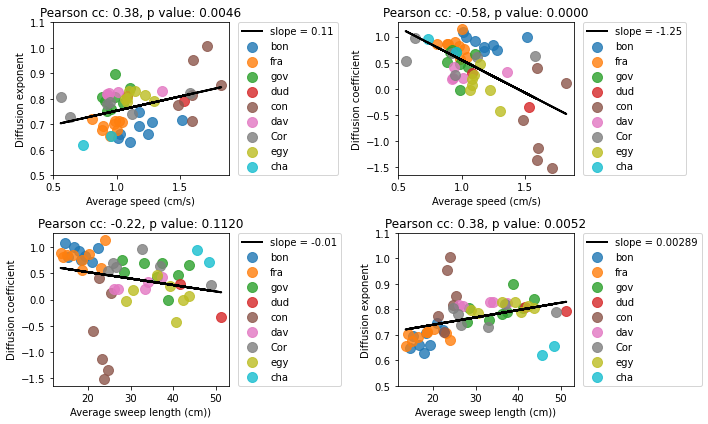

In [7]:
#first avearge all the values under each key in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday...
all_ave_speed_perday_ave = {}
all_ave_activespeed_perday_ave = {}
all_sweep_len_perday_ave = {}
all_exponent_perday_ave = {}
all_intercept_perday_ave = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_ave[key] = np.mean(all_ave_speed_perday[key])
    all_ave_activespeed_perday_ave[key] = np.mean(all_ave_activespeed_perday[key])
    all_sweep_len_perday_ave[key] = np.mean(all_sweep_len_perday[key])
    all_exponent_perday_ave[key] = np.mean(all_exponent_perday[key])
    all_intercept_perday_ave[key] = np.mean(all_intercept_perday[key])
    
#group all the keys in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday by animal name
all_ave_speed_perday_concat = {}
all_ave_activespeed_perday_concat = {}
all_sweep_len_perday_concat = {}
all_exponent_perday_concat = {}
all_intercept_perday_concat = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_concat.setdefault(key[0], []).append(all_ave_speed_perday_ave[key])
    all_ave_activespeed_perday_concat.setdefault(key[0], []).append(all_ave_activespeed_perday_ave[key])
    all_sweep_len_perday_concat.setdefault(key[0], []).append(all_sweep_len_perday_ave[key])
    all_exponent_perday_concat.setdefault(key[0], []).append(all_exponent_perday_ave[key])
    all_intercept_perday_concat.setdefault(key[0], []).append(all_intercept_perday_ave[key])
   
#select colors equals to number of animals from a colormap
#put them in a dictionary with animal names as keys
colors = plt.cm.get_cmap('tab10', len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)
 
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
#plot all_exponent_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)

#pearson test
corr, p = pearsonr(speed_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed (cm/s)')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(2,2,2)
#plot all_intercept_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, intercept_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)

#pearson test
corr, p = pearsonr(speed_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed (cm/s)')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2,2,3)
#plot all_intercept_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, intercept_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2,2,4)
#plot all_exponent_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])   
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])



plt.tight_layout()
plt.show()


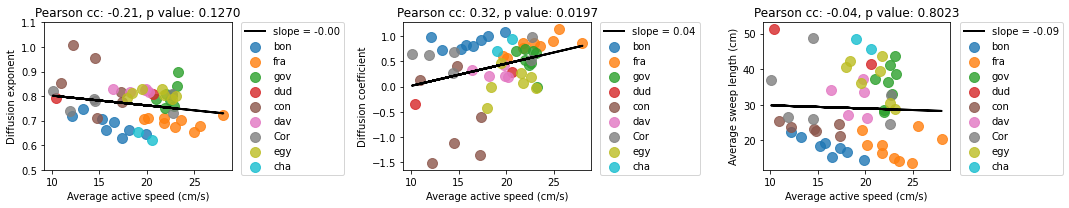

In [9]:
#plot the exponent against average active speed, and intercept against average active speed
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
#plot all_exponent_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(1,3,2)
#plot all_intercept_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, intercept_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#plot sweep length against average active speed
plt.subplot(1,3,3)
#plot all_sweep_len_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_sweep_len_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_sweep_len_perday_concat to numpy array
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, sweep_len_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, sweep_len_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Average sweep length (cm)')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    

plt.tight_layout()
plt.show()


### 2, shuffle the epoch key of replay (control study, in-animal shuffle)

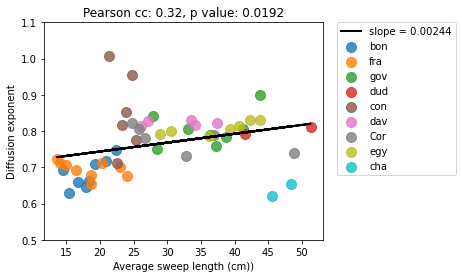

In [60]:
#for each key in all_exponent_perday_concat, shuffle the values in the list
#store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled = {}
for key in all_exponent_perday_concat.keys():
    all_exponent_perday_concat_shuffled[key] = np.random.permutation(all_exponent_perday_concat[key])
    
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled against all_sweep_len_perday_concat_shuffled
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled[name]), 
                np.array(all_exponent_perday_concat_shuffled[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    

### 3, cross-animal shuffle

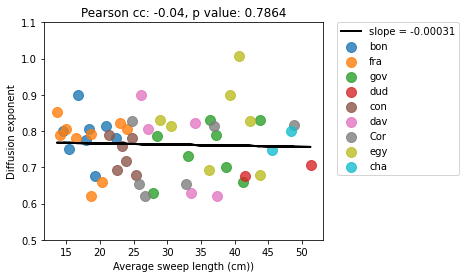

In [61]:
#for each key in all_exponent_perday_concat, shuffle the values in the list by replacing each of them with a 
#random value sampled from other keys, and store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled_crossanimal = {}
for key in all_exponent_perday_concat.keys():
    #first get all the values except the values under the current key
    all_values = []
    for key2 in all_exponent_perday_concat.keys():
        if key2 != key:
            all_values.extend(all_exponent_perday_concat[key2])
    #then shuffle the values under the current key by sampling the same number of values from all_values
    all_exponent_perday_concat_shuffled_crossanimal[key] = np.random.choice(all_values, len(all_exponent_perday_concat[key]), replace=False)
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled_crossanimal = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled_crossanimal against all_sweep_len_perday_concat_shuffled_crossanimal
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled_crossanimal[name]), 
                np.array(all_exponent_perday_concat_shuffled_crossanimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled_crossanimal and all_exponent_perday_concat_shuffled_crossanimal to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled_crossanimal.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled_crossanimal.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
